# Word Embeddings mit Gensim verwenden und erstellen

# Word Embeddings verwenden

## Fertige Word embeddings laden - Grundlagen

Wenn man die Vektoren nicht weiter trainieren will, dann kann man  Arbeitsspeicher sparen, wenn man nur das Gensim-Format KeyedVectors speichert bzw. lädt. Dann werden der innere Zustand des Netzes, die Häufigkeit des Vokabulars und der Zwischenstand der hidden weights entfernt. Normalwerweise will man keyedVectors verwenden. *Wichtig*: Gensim ermöglicht es, word2vec und FastText im KeyedVectors-Format zu laden. Tut man das nicht, wird man bei manchen Modellen in Arbeitsspeicher-Probleme laufen. 

In [4]:
%matplotlib inline
import os
import urllib.request
import gensim  
from sklearn.manifold import TSNE  # besser wäre umap
import matplotlib.pyplot as plt


e:\conda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
#convenience function 

def plot_word_embeddings(model, search_list):
    words = []
    for term in search_list:
        words += [w[0] for w in model.wv.most_similar([term], topn=5)]                                   
    words += search_list    

    vectors = model.wv[words]

    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=7)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(16, 10))
    plt.scatter(T[:, 0], T[:, 1])
    for label, x, y in zip(words, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+2, y+2), xytext=(0, 0), textcoords='offset points')


Zuerst verwenden wir ein vorgefertigtes w2v Modell fürs Deutsche auf der Grundlage der Wikipedia und von Zeitungsartikeln 
(<a href='https://devmount.github.io/GermanWordEmbeddings'>Quelle</a>)

In [115]:
url = 'http://cloud.devmount.de/d2bc5672c523b086/german.model'
urllib.request.urlretrieve(url, "german_model.bin")

('german_model.bin', <http.client.HTTPMessage at 0x1c4f5b119b0>)

Da in dem heruntergeladenen Modell ohnehin nicht die Informationen vorhanden sind, um es weiter zu trainieren, laden wir die Datei, die im binären Word2Vec-Format vorliegt, gleich ins das generische KeyedVectors-Format.

In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format('german_model.bin', binary=True)

## Typische Anwendungen

Das Modell ist ziemlich eigenwillig, da alle Umlaute gegen ae, oe, ue usw. ausgetauscht wurden sowie ß gegen ss. Man wird also unter 'König' nicht fündig, sondern unter 'Koenig'.

Den Vektor für ein Wort ausgeben:

In [117]:
print("Länge des word embedding Vektors: ", len(model['Koenig']))
model['Koenig'][0:4]

Länge des word embedding Vektors:  300


array([0.1141477 , 0.11475459, 0.10349818, 0.29905704], dtype=float32)

Die n ähnlichsten Worte (n=12)

In [118]:
model.most_similar('Koenig', topn=12)

[('Prinz', 0.7856332659721375),
 ('Koenigs', 0.7356206774711609),
 ('Koenigin', 0.7255839109420776),
 ('Jungkoenig', 0.7053836584091187),
 ('Kaiser', 0.7047818303108215),
 ('Prinzen', 0.6925939321517944),
 ('Jungschuetzenkoenig', 0.6864457726478577),
 ('Kronprinz_Philippe', 0.6853584051132202),
 ('Koenig_Willem', 0.6849293112754822),
 ('Thron', 0.6848670840263367),
 ('Willem-_Alexander', 0.6764872074127197),
 ('Prinzessin', 0.6718595027923584)]

Die Ähnlichkeit von zwei Worten ermitteln

In [119]:
model.distance('lachen', 'freuen')

0.5140720693563178

queen = (king - man) + woman

In [120]:
model.most_similar(positive=['Koenig', 'Frau'], negative=['Mann'])

[('Koenigin', 0.7524535655975342),
 ('Prinzessin', 0.71452796459198),
 ('Prinz', 0.6881616115570068),
 ('Jungschuetzenkoenigin', 0.6740391254425049),
 ('Majestaet', 0.659064769744873),
 ('Kronprinz_Philippe', 0.6576777696609497),
 ('Regentin', 0.6576672792434692),
 ('Prinzen', 0.6576203107833862),
 ('Carl_XVI', 0.6540848016738892),
 ('Prinzessin_Maxima', 0.6527887582778931)]

Analogie-Task (funktioniert mit dem Korpus nicht)

In [121]:
model.most_similar(positive=['Frankreich', 'Italien'], negative=['Paris'])

[('Griechenland_Portugal', 0.7352920770645142),
 ('Spanien', 0.7317901253700256),
 ('Spanien_Portugal', 0.7244757413864136),
 ('Slowenien', 0.723360002040863),
 ('Portugal', 0.7120522260665894),
 ('Griechenland', 0.7028197050094604),
 ('Finnland', 0.7025828957557678),
 ('Kroatien', 0.6999912261962891),
 ('Portugal_Spanien', 0.6995013952255249),
 ('Portugal_Griechenland', 0.6971961259841919)]

Evaluationsverfahren für Word Embeddings

In [122]:
model.most_similar_to_given('Apfel', ['Orange', 'Stuhl', 'Berg', 'Freiheit'])

'Orange'

In [123]:
model.doesnt_match(['Apfel', 'Birne', 'Haus', 'Pflaume'])

'Haus'

e:\conda\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
e:\conda\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


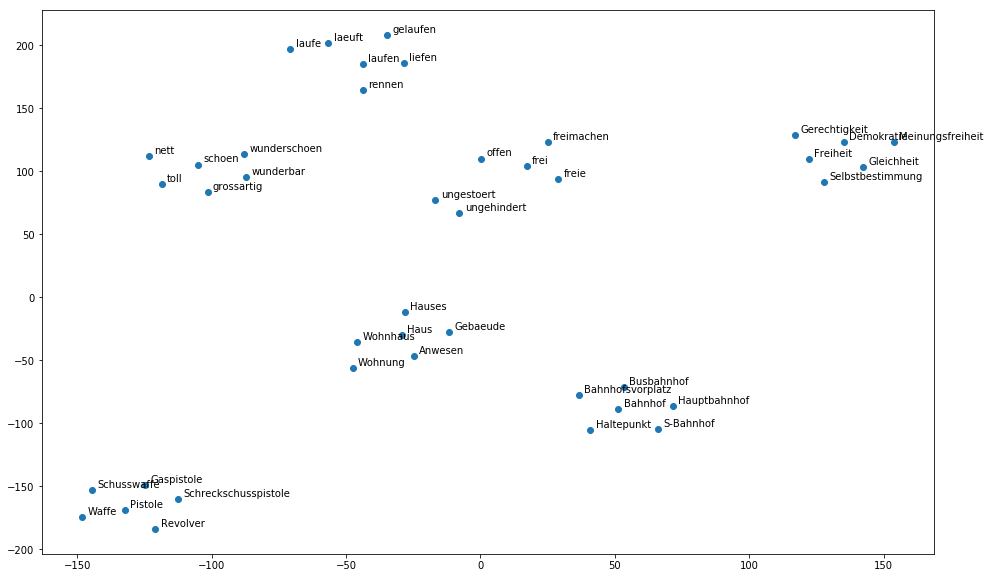

In [7]:
search_list = ['Haus', 'Pistole', 'Freiheit', 'Bahnhof', 'laufen', 'schoen', 'frei']
plot_word_embeddings(model, search_list)

### Andere Formate verwenden

Es gib ein einfaches Klartextformat, das von Word2Vec definiert wurde, und deshalb so auch in Gensim heißt. In der ersten Zeile stehen zuerst die Größe des Wortschatzes gefolgt von der Länge der Vektoren. Dann folgt in je einer Zeile ein Wortvektor: Zuerst das Wort, dann der Vektor, getrennt jeweils durch ein Leerzeichen. Z.B: 
 
    50000 300
    der 0.476841 -0.620207 [weitere 298 Zahlen]
    und 0.217949 0.366985  [weitere 298 Zahlen]
    [weitere 49998 Zeilen]

Im Notfall muss man also nur die jeweils verfügbaren Formate entsprechend umformatieren, zumeist bedeutet das vor allem, dass man die erste Zeile ergänzt. Es gibt auch ein Skript in Gensim, das diese Arbeit übernimmt:

    from gensim.scripts.glove2word2vec import glove2word2vec
    glove2word2vec(glove_file, w2v_file)
    
Oder als Kommandozeilen-Aufruf:

    python -m gensim.scripts.glove2word2vec --input <glove_file> --output <w2v_file>

Dieses Format unterstützt allerdings nur die Möglichkeiten von Word2Vec und z.B. kann man hier keine Buchstaben- ngram-basierte Ähnlichkeitssuche machen wie in FastText.

Im folgenden verwenden wir Vektoren, die mit Glove auf der Grundlage der dt. Wikipedia  2018 erstellt wurden ([Quelle](https://deepset.ai/german-word-embeddings)). Die Vektordatei wurde wie oben beschrieben angepasst, so dass der Kopf nun so aussieht:

    853624 300
    der 0.476841 -0.620207 [weitere 298 Zahlen]
    und 0.217949 0.366985  [weitere 298 Zahlen]
    [weitere 853622 Zeilen]


In [125]:
model_glove_path = r"e:\downloads\glove_de.wiki.txt"
model_glove = gensim.models.keyedvectors.Word2VecKeyedVectors.load_word2vec_format(model_glove_path)

In [126]:
model_glove.most_similar('könig', topn=12)

[('königs', 0.7446180582046509),
 ('kaiser', 0.6865873336791992),
 ('haeburu', 0.6471267938613892),
 ('königin', 0.6418213248252869),
 ('herrscher', 0.6390000581741333),
 ('herzog', 0.6324105262756348),
 ('mapum', 0.6155743598937988),
 ('vonsardinien', 0.6119541525840759),
 ('skandhasvati', 0.6098807454109192),
 ('dongseong', 0.6086020469665527),
 ('chwiheui', 0.6060369610786438),
 ('könige', 0.6022825837135315)]

Hier sieht man einige nächste Nachbarn, die eindeutig unserer einschlägigen Intuition widersprechen, z.B. haeburu, mapum, vonsardinien usw.

Auch die [FastText-Vektoren](https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md) können wir im Textformat laden.

In [127]:
fasttest_model_path = r"\mydata\Dropbox\uni\Romangeschichte\romankorpus\nlp\word_vectoren\cc.de.300.vec"
model_ftvec = gensim.models.keyedvectors.Word2VecKeyedVectors.load_word2vec_format(fasttest_model_path)   #fasttext.FastText.load(fasttest_model_path)

In [128]:
model_ft2.most_similar('König', topn=12)

[('Königs', 0.7586836814880371),
 ('Könige', 0.7204126119613647),
 ('Kaiser', 0.7052278518676758),
 ('Königin', 0.6770805716514587),
 ('Prinz', 0.6656655669212341),
 ('Königen', 0.6584115028381348),
 ('Herrscher', 0.6460695266723633),
 ('Exkönig', 0.645708441734314),
 ('Herzog', 0.6453874111175537),
 ('Kronprinz', 0.6435501575469971),
 ('Prinzen', 0.6375187635421753),
 ('Königssohn', 0.6359872817993164)]

Wir versuchen nun uns die nächsten Nachbarn eines Wortes anzeigen zu lassen, das nicht im Vokabular des Word Embeddings vorhanden ist:

In [129]:
try:
    model_ftvec.most_similar('bekönigen')
except KeyError as e:
    print(e)

"word 'bekönigen' not in vocabulary"


Im folgenden laden wir das binäre Format von Fasttext. 

In [130]:
fasttest_model_path = r"\mydata\Dropbox\uni\Romangeschichte\romankorpus\nlp\word_vectoren\cc.de.300.bin"
model_ftbin = gensim.models.fasttext.FastText.load_fasttext_format(fasttest_model_path)

In [150]:
model_ftbin.wv.most_similar('König', topn=12)

[('KNM-LT10in', 0.5801372528076172),
 ('Exkönig', 0.5719518065452576),
 ('Köng', 0.5578429698944092),
 ('könig', 0.5547064542770386),
 ('Könige', 0.5390152335166931),
 ('D.João', 0.5327420234680176),
 ('Königs', 0.529573917388916),
 ('Königen', 0.5216035842895508),
 ('Ex-König', 0.5137853622436523),
 ('64732', 0.49704819917678833),
 ('KNM-LF10in', 0.49465739727020264),
 ('Fürst', 0.49079567193984985)]

Hier können wir nun auch die nächsten Nachbaren für Worte ermitteln, die nicht im Vokabular sind. Es wird eine Annäherung aufgrund der enthaltenen Buchstaben-Ngramme errechnet. 

In [132]:
model_ftbin.wv.most_similar('bekönigen')

e:\conda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('Vizekönigen', 0.5037499070167542),
 ('Zaunkönigen', 0.45465680956840515),
 ('Niederhünigen', 0.44706296920776367),
 ('Unversöhnlichen', 0.44332242012023926),
 ('Dreikönigen', 0.4410608410835266),
 ('Co.Wikileaks', 0.44026750326156616),
 ('Stadthäuschen', 0.43656623363494873),
 ('AllerleiLeipziger', 0.43528369069099426),
 ('Kleinkönigen', 0.4334792494773865),
 ('beköstigen', 0.4331730604171753)]

# Word embeddings erstellen

Word Embeddings mit Gensim zu trainieren, ist ausgesprochen einfach. Wir brauchen eine Liste von Listen (generisch: einen Iterator über Interatoren), den wir der Klasse word2vec in Gensim übergeben. Das war es schon. Hier trainieren wir word2vec word embeddings:

In [8]:
sentences = [['das', 'haus', 'auf', 'dem', 'hügel', 'ist', 'kaum', 'beleuchtet'],
            ['ein', 'trüber', 'schimmer', 'aus', 'dem', 'obersten', 'fenster', 'ist', 'das', 'einzige', 'licht'],
            ['dieses', 'licht', 'aber', 'erlischt', 'nie'],
            ['selbst', 'wenn', 'das', 'haus', 'auf', 'dem', 'hügel', 'schläft', 'flackert', 'hier', 'das', 'trübe','licht'],
            ['wie', 'bei', 'einem', 'kind', 'das', 'nicht', 'im', 'dunkeln', 'schlafen', 'kann']]
            

In [9]:
model = gensim.models.Word2Vec(sentences, min_count=1, sg=1) # min_count legt fest, wie häufig ein Wort vorkommen muss, um verarbeitet zu werden. 
                                                             # Üblicherweise höher als 1
                                                             # sg = 1 verwendet skipgram (und nicht cbow)

In [10]:
model.save('shortest_model.bin')  #dieses Format, erlaubt es, das Modell zu laden und es weiter zu trainieren

model = gensim.models.word2vec.Word2Vec.load('shortest_model.bin')

In [11]:
model = gensim.models.word2vec.Word2Vec.load('shortest_model.bin')

Das folgende sind die wichtigsten Parameter beim Training:
* **size** (int, optional) – Dimensionality of the word vectors.
* **window** (int, optional) – Maximum distance between the current and predicted word within a sentence.
* **min_count** (int, optional) – Ignores all words with total frequency lower than this.
* **workers** (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
* **sg** ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.
* **hs** ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.

Wenn man es genau nimmt, dann ist word2vec nicht ein Algorithmus, sondern eine Gruppe, die aus mindestens vier verschiedenen Algorithmen besteht. Es gibt zwei unterschiedliche Ziele auf die hin man word2vec einstellen kann:

* CBOW (continous bag of words): Sage die Klasse des Focusworts voraus - bei gegebenem Kontext. 
* Skipgram: Sage die Klasse des Kontextworts voraus - bei gegebenem Focuswort (Das ist das Verfahren, dass in Jurasky/Martin 2018 Chap. 6 erläutert wird). 

Und außerdem gibt es zwei Strategien, wie man das Netz vereinfachen kann. Typisch ist der letzte Layer ein Softmax, aber das würde hier dazu führen, dass der jeweils übers ganze Vokabular berechnet werden muss. Die beiden vorgeschlagenen Verfahren vermeiden das und beschleunigen w2v deshalb erheblich.

* Hierarchical Softmax
* Negative Sampling (Das ist das Verfahren, dass in Jurasky/Martin 2018 Chap. 6 erläutert wird)

Es gibt eine Reihe von empirischen Untersuchungen darüber, welche Parameter für welche Umstände besonders geeignet sind. Kleine Werte für das Kontextfenster führen nach Levy und Goldberg 2014 typischerweise dazu, dass Worte als semantisch besonders ähnlich aufgeführt werden, die in einer paradigmatischen Beziehung zum Focuswort stehen, also in anderen Sätzen anstelle des Focusworts verwendet werden können (Sunnydale statt Hogwarts), während größere Fenster andere typische Begriffe des Frames auftauchen (Dumbeldore usw.). 


Die folgende Klasse ist eine triviale Version eines Generators, der alle Dateien in einem Unterverzeichnis  einliest, die Zeilen in Sätze aufteilt und die Sätze in Wörter zerlegt. Dabei wird vorausgesetzt, dass 
* jede Datei die Endung txt hat,
* in jeder Zeile ein oder mehrere Sätze enthalten sind.

Stopwords müssen wir hier nicht entfernen, da sehr häufige Wörter bereits durch den word2vec-Algorithmus entspechend behandelt werden. Wir ignorieren hier die Großschreibung, aber ob das sinnvoll ist, hängt natürlich von der Verwendung der Embeddings ab.

In [12]:
from pathlib import Path
import nltk
import re


class Sentences(object):
    def __init__(self, dirname, lower=True):
        self.dirname = dirname
        self.lower = lower
 
    def __iter__(self):
        for filename in Path(self.dirname).glob('*.txt'):
            with open(filename, encoding="utf-8") as filein:
                for line in filein:
                    if self.lower:
                        line = line.lower()
                    sentences = nltk.sent_tokenize(line)
                    for sentence in sentences:
                        yield re.findall('\w+', sentence)
                        

In [13]:
data_path = r'\mydata\Dropbox\uni\Romangeschichte\romankorpus\gesamt\Kernkorpus\TextGrid\txt'
model = gensim.models.Word2Vec(Sentences(data_path), size=100, window=5, min_count=2, workers=6, sg=1)

In [14]:
model.save('roman_model.bin')

In [15]:
model.wv.most_similar('könig', topn=4)

[('käyser', 0.8460648655891418),
 ('notesterich', 0.822159469127655),
 ('landvogt', 0.8180943727493286),
 ('großfürst', 0.8074260354042053)]

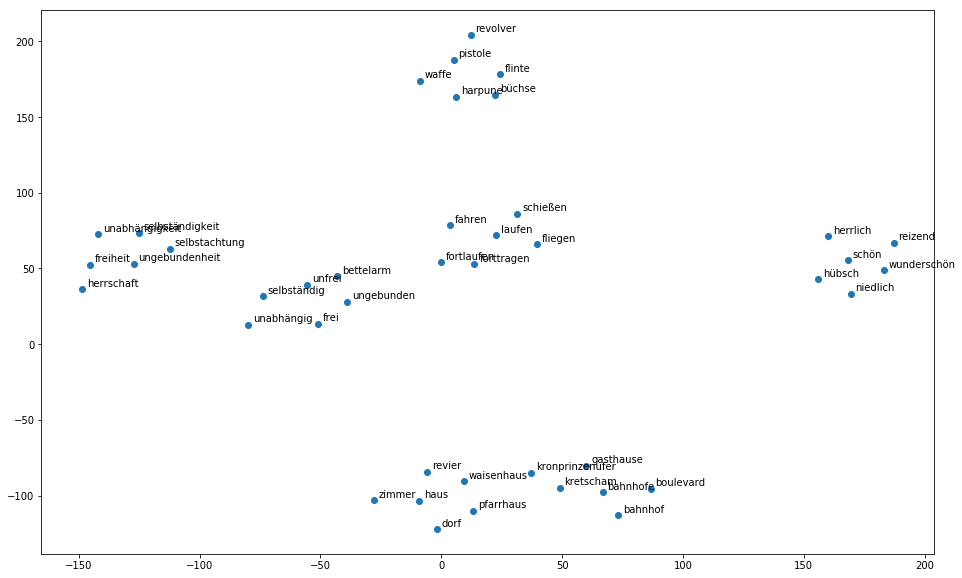

In [16]:
search_list = ['haus', 'pistole', 'freiheit', 'bahnhof', 'laufen', 'schön', 'frei']
plot_word_embeddings(model, search_list)

Da FastText das OOV-Problem (OOV = out of vocabulary) sehr gut löst und in einigen Tests auch deutlich besser abschneidet als word2vec, wurde der Algorithmus von Gensim ebenfalls implementiert. Auch hier ist der Code denkbar einfach:

In [17]:
#needs significantly more time than w2v
model_ft = gensim.models.FastText(Sentences(data_path), size=100, window=5, min_count=5, workers=6, sg=1)

In [18]:
model_ft.save('roman_model_ft.bin')

In [19]:
model_ft.wv.most_similar('könig', topn=4)

[('erlkönig', 0.9377613067626953),
 ('perserkönig', 0.8959602117538452),
 ('großfürst', 0.8891346454620361),
 ('könige', 0.8890302181243896)]

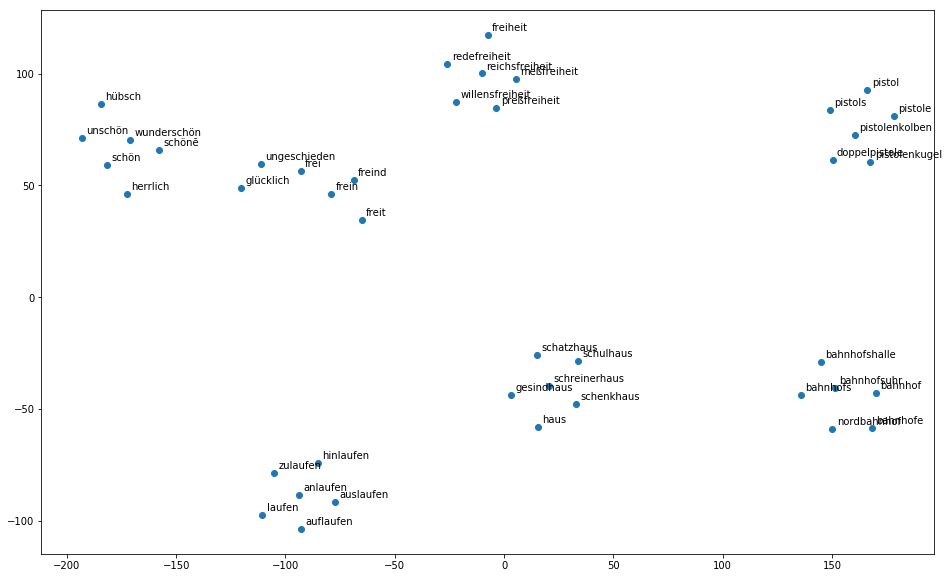

In [20]:
search_list = ['haus', 'pistole', 'freiheit', 'bahnhof', 'laufen', 'schön', 'frei']
plot_word_embeddings(model_ft, search_list)

### Word2Vec vs. Fasttext
Es gibt von Sharan Yalburgi aus dem Umfeld von Gensim einen [Vergleich von word2vec und Fasttext](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Word2Vec_FastText_Comparison.ipynb), dessen Ergebnis besagt, dass FastText-word embeddings besser für syntakische Fragestellungen geeignet sind, während sich word2vec ein wenig besser im Fall von semantischen Fragestellungen schlägt. Die Unterschiede zwischen den Verfahren weren mit zunehmender Korpus-Größe immer kleiner. Beim Brown-Korpus (1 mio. Wörter) sind sie noch sehr ausgeprägt, während sie bei Text8 (17 mio. Wörter) schon deutlich geringer ausfallen und noch mehr bei Text9 (ca. das 9fache, also ca. 153 mio Wörter). Noch wichtiger ist vielleicht, dass dabei auch deutlich wird, dass die Qualität der Word Embeddings bei allen Algorithmen sehr von der Größe des Trainingskorpus abhängt. Word2vec verbessert sich von ca. 20% Accuracy beim Brown Corpus zu 40% bei Text8 und 60% bei Text9.

# Embeddings in Deep Learning verwenden

Das folgende Spiel-Beispiel zeigt, wie man Embeddings verwenden kann, um eine Textklassifikation durchzuführen. Da die Daten so schlicht sind, ist das DL-Modell sehr einfach. Hier geht es vor allem darum zu zeigen, wie die bereits trainierten Embeddings verwendet werden können.

Zentraler Schritt dabei ist die Tokenisierung des Textes und die Erzeugung einer Abbildung von allen Worten auf eine ganze Zahl (Wort->Integer)

In [34]:
# based on https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py
# and with ideas from https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from numpy import array
from numpy import zeros
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

#Pfad zum FastText Model
fasttest_model_path = r"\daten\Dropbox\uni\Romangeschichte\romankorpus\nlp\word_vectoren\cc.de.300.vec"

#DATENAUFBEREITUNG
# define documents
docs = ["Gut gemacht!",
        "Gute Arbeit",
        "Hervorragend",
        "Wirklich großartige Leistung",
        "Ganz Ausgezeichnet!",
        "ziemlich schwach",
        "sehr Schlechte Leistung!",
        "nicht gut",
        "schlechte Arbeit",
        "Hätte besser sein können.",
        "total stark",
        "grottenschlecht"]

# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0,1,0])

Tokenisierung sowie Erzeugung des Wortindexes mit der entsprechenden Funktion in Keras. 
In der Praxis sollte man das selbst machen. So erzeugen wir 1) eine Abbildung aller Worte auf eine ganz Zahl (word->Integer) und 2) eine Version unserer Dokumente, in denen jedes Wort durch die entsprechende ganze Zahl ersetzt ist 


In [35]:
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1  # Das zusätzliche Zeichen, die 0, verwenden wir zum Padding, s.u.
print("Größe des Vokabulars: ", vocab_size)
print("\nWort->Integer: ", t.word_index)

# In allen Dokumenten werden die Worte durch Zahlen ersetzt  
encoded_docs = t.texts_to_sequences(docs)
print("\nZahlenkodierte Dokumente: ", encoded_docs)

Größe des Vokabulars:  23

Wort->Integer:  {'gut': 1, 'arbeit': 2, 'leistung': 3, 'schlechte': 4, 'gemacht': 5, 'gute': 6, 'hervorragend': 7, 'wirklich': 8, 'großartige': 9, 'ganz': 10, 'ausgezeichnet': 11, 'ziemlich': 12, 'schwach': 13, 'sehr': 14, 'nicht': 15, 'hätte': 16, 'besser': 17, 'sein': 18, 'können': 19, 'total': 20, 'stark': 21, 'grottenschlecht': 22}

Zahlenkodierte Dokumente:  [[1, 5], [6, 2], [7], [8, 9, 3], [10, 11], [12, 13], [14, 4, 3], [15, 1], [4, 2], [16, 17, 18, 19], [20, 21], [22]]


Keras kann besonders gut mit Input umgehen, wenn er immer gleich groß ist. Da die Sätze unterschiedlich lang sind, müssen sie auf eine Standardlänge gesetzt werden und evtl. kürzere Sätze werden mit Paddingzeichen aufgefüllt


In [36]:
max_length = 4  # kein Dokument ist länger als 4 Worte
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print("\nPadded Docs: \n", padded_docs)


Padded Docs: 
 [[ 1  5  0  0]
 [ 6  2  0  0]
 [ 7  0  0  0]
 [ 8  9  3  0]
 [10 11  0  0]
 [12 13  0  0]
 [14  4  3  0]
 [15  1  0  0]
 [ 4  2  0  0]
 [16 17 18 19]
 [20 21  0  0]
 [22  0  0  0]]


Pretrained Word embeddings einlesen. 


In [ ]:
embeddings = gensim.models.keyedvectors.Word2VecKeyedVectors.load_word2vec_format(fasttest_model_path)

Wir erzeugen eine Matrix, die jedem Wort des Korpus einen Vektor zuordnet. Der Zeilenindex aligniert dabei 
die Matrix mit der Word->Integer-Abbildung. D.h. Die 2. Zeile der Matrix hat den Index 1 und enthält
den Vektor für das Wort, das in der Word->Integer Abbildung die 1 zugewiesen bekommen hat


In [38]:
embedding_size = 300
embedding_matrix = zeros((vocab_size, embedding_size)) #erzeugt eine leere Matrix mit Zeilen für 
                                                       #jedes Wort und Spalten in der Größe des embedding Vektors 
for word, i in t.word_index.items():
    try: 
        embedding_vector = embeddings[word]
    except KeyError:
        embedding_vector = None
        print("Nicht in den Embeddings: ", word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("\nForm der Matrix: ", embedding_matrix.shape)
print("\nEmbedding Matrix: \n", embedding_matrix)


Form der Matrix:  (23, 300)

Matrix: 
 [[ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.0068  0.0143  0.1549 ... -0.0795 -0.0023 -0.0477]
 [-0.0448 -0.0149  0.0844 ...  0.0243  0.0512 -0.0793]
 ...
 [ 0.0214 -0.0351  0.0533 ... -0.0418 -0.0935 -0.0052]
 [-0.0169  0.0407  0.0391 ...  0.0351  0.0168 -0.0448]
 [-0.0033 -0.0313  0.012  ...  0.0009  0.0033  0.0016]]


Im Folgenden verwenden wir die Matrix im 'Embedding-Layer', der ersten Ebene des Netzes.

In [44]:
#DEEP LEARNING
# define model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,         #Größe des Vokabulars 
                    output_dim=embedding_size,    #Länge des Embedding Vektors
                    weights=[embedding_matrix],   
                    input_length=4,               #Länge der Dokumente
                    trainable=False))             #Embeddings können durch das Training nicht verändert werde
model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 4, 300)            6900      
_________________________________________________________________
flatten_18 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 6005      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 6         
Total params: 12,911
Trainable params: 6,011
Non-trainable params: 6,900
_________________________________________________________________
None
Accuracy: 100.000000


Wir können die Embeddings auch auf unserem Trainingsmaterial trainieren. Wenn die Textmenge groß genug ist, dann funktioniert das oft ebenso gut wie pretrained word embeddings. 

In [49]:
#DEEP LEARNING
# define model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,         #Größe des Vokabulars 
                    output_dim=5,                 #Länge des Embedding Vektors
                    input_length=4,               #Länge der Dokumente
                    trainable=True))              #Embeddings können durch das Training verändert werde
model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 4, 5)              115       
_________________________________________________________________
flatten_23 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 6         
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 83.333331


### Weitere Themen

* Word Embeddings evaluieren
* Wofür sind die unterschiedlichen Embeddings besonders geeignet?



# Literatur

D. Jurafsky, J.H. Martin: Chap. 6: Vector Semantics. In: Speech and Language Processing 3rd ed. draft 23.9.2018. [online](https://web.stanford.edu/~jurafsky/slp3/6.pdf).

O. Levy, Y. Goldberg: Dependency-based word embeddings. [ACL 2014](http://www.aclweb.org/anthology/P14-2050).
